In [1]:
import argparse
import cv2
import os
import easygui
import pandas as pd
from matplotlib import pyplot as plt

# import the necessary packages
import argparse
import cv2
import os
import easygui
import pandas as pd
from matplotlib import pyplot as plt

# Find local extrema
from scipy.signal import argrelextrema


class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y)-coordinates of
        # the crop
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0

    def getMemoryShapes(self, inputs):
        # the crop layer will receive two inputs -- we need to crop
        # the first input blob to match the shape of the second one,
        # keeping the batch size and number of channels
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])

        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H

        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]

    def forward(self, inputs):
        # use the derived (x, y)-coordinates to perform the crop
        return [inputs[0][:, :, self.startY:self.endY,
                self.startX:self.endX]]

# load our serialized edge detector from disk
print("[INFO] loading edge detector...")

fpath = os.path.abspath('./jupyter')
fdir =  os.path.dirname(fpath)
print(fdir)
protoPath = os.path.sep.join([fdir,"hed", "deploy.prototxt"])
print(protoPath)
modelPath =  os.path.sep.join([fdir,"hed","hed_bsds.caffemodel"])
print(modelPath)

#net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

# register our new layer with the model
#cv2.dnn_registerLayer("Crop", CropLayer)

[INFO] loading edge detector...
/home/dstark1977_gmail_com/repo/jupyter
/home/dstark1977_gmail_com/repo/jupyter/hed/deploy.prototxt
/home/dstark1977_gmail_com/repo/jupyter/hed/hed_bsds.caffemodel


[INFO] performing Canny edge detection...
[[[[ 51.  47.  45. ... -61. -60. -65.]
   [ 51.  49.  47. ... -61. -62. -62.]
   [ 53.  53.  50. ... -61. -62. -64.]
   ...
   [  1.   2.   5. ...  12.  13.  15.]
   [  6.   1.   6. ...  13.  13.  12.]
   [  1.   2.   7. ...  12.  14.  21.]]

  [[ 56.  55.  53. ... -39. -39. -42.]
   [ 56.  55.  55. ... -40. -41. -40.]
   [ 58.  58.  57. ... -39. -39. -43.]
   ...
   [ 32.  34.  35. ...  37.  38.  40.]
   [ 37.  36.  35. ...  38.  35.  36.]
   [ 37.  37.  38. ...  36.  41.  39.]]

  [[103. 100.  98. ...  10.  10.   2.]
   [103. 101. 100. ...   9.   8.   8.]
   [105. 104. 102. ...   9.   9.   7.]
   ...
   [ 85.  87.  89. ...  89.  90.  91.]
   [ 84.  83.  88. ...  89.  88.  87.]
   [ 79.  80.  91. ...  81.  81.  85.]]]]
[INFO] performing holistically-nested edge detection...


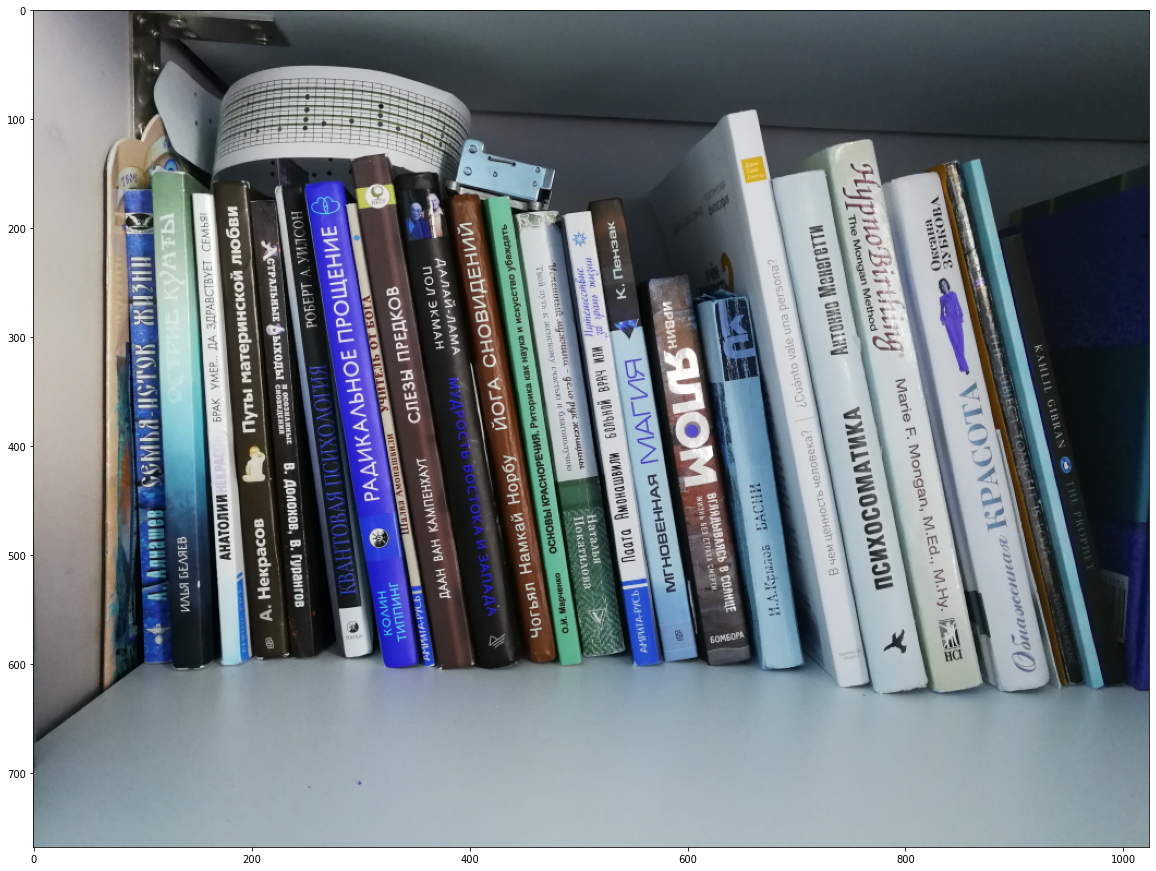

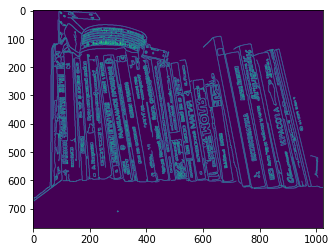

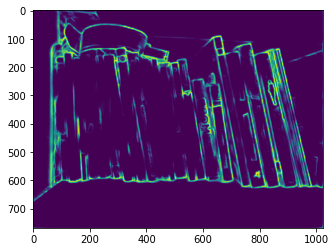

In [2]:
# load the input image and grab its dimensions
image = cv2.imread('sample.jpg')

# resize image
scale_percent = 20 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

# image =cv2.equalizeHist(img)
# image = cv2.pyrMeanShiftFiltering(image1,10,20)
(H, W) = image.shape[:2]
# print(image.shape[:2])
# image.shape[:2] =(H*3, W*3)ho

# convert the image to grayscale, blur it, and perform Canny
# edge detection
print("[INFO] performing Canny edge detection...")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# blurred = cv2.addWeighted(gray,1.5,blurred,-0.5,0)
canny = cv2.Canny(blurred,30, 150)


# construct a blob out of the input image for the Holistically-Nested
# Edge Detector

# cc = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
# image = image+cc

# mean = (104.00698793, 116.66876762, 122.67891434),

blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),
                             # mean=(110,95,95),
                             # mean=(104.00698793, 116.66876762, 122.67891434),
                            # mean=(104, 116, 122),
                             mean=(130, 120, 75),
                            #  mean=(145, 147, 180),
                             swapRB= False, crop=False)
print( blob)
cv2.waitKey(0)
# set the blob as the input to the network and perform a forward pass
# to compute the edges
print("[INFO] performing holistically-nested edge detection...")
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")
# show the output edge detection results for Canny and
# Holistically-Nested Edge Detection
plt.figure(figsize = (20,20))
plt.imshow(image)
plt.show()
plt.imshow(canny)
plt.show()
plt.imshow(hed)
plt.show()

#plt.imwrite(hout, hed)
#plt.waitKey(0)

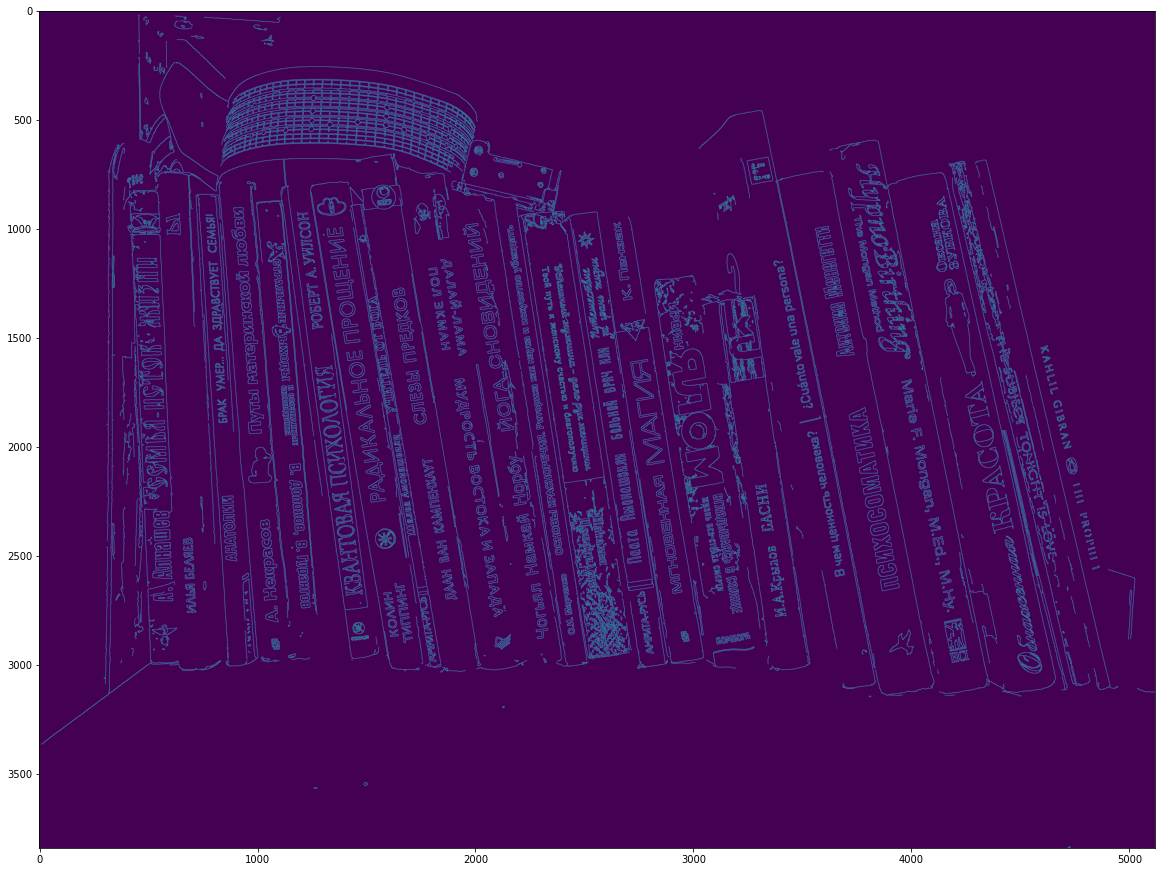

In [2]:
import cv2
import numpy as np
from google.cloud import storage
import json
from matplotlib import pyplot as plt

def imread_blob(blob):
    img = cv2.imdecode(np.asarray(bytearray(blob.download_as_string()), dtype=np.uint8), cv2.IMREAD_COLOR)
    return img

client = storage.Client()
bucket = client.get_bucket('biblosphere-210106.appspot.com')

user = '0000000000000000000000000000'
shelf = '0000000000033'

#user = 'AWsv5n9QiJYIUcDQmxWlBKRoBzZ2'
#shelf = '1590618924998' # '1590619142574', '1590619327951'
#shelf = '1590619142574' # '1590619327951'
#shelf = '1590619327951'

image_blob = bucket.blob('images/%s/%s.jpg' % (user, shelf))
result_blob = bucket.blob('images/%s/%s.json' % (user, shelf))

img = imread_blob(image_blob)
results = json.loads(result_blob.download_as_string())
#for b in results['recognized']:
#    cv2.drawContours(img, np.array([b['outline']]), 0, (0, 255, 0), 7)
#for b in results['unrecognized']:
#    cv2.drawContours(img, np.array([b['outline']]), 0, (0, 0, 255), 7)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# blurred = cv2.addWeighted(gray,1.5,blurred,-0.5,0)
canny = cv2.Canny(blurred, 30, 150)

plt.figure(figsize = (20,20))
plt.imshow(canny)

mask shape/dtype: (84, 3849) uint8
00:15 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   

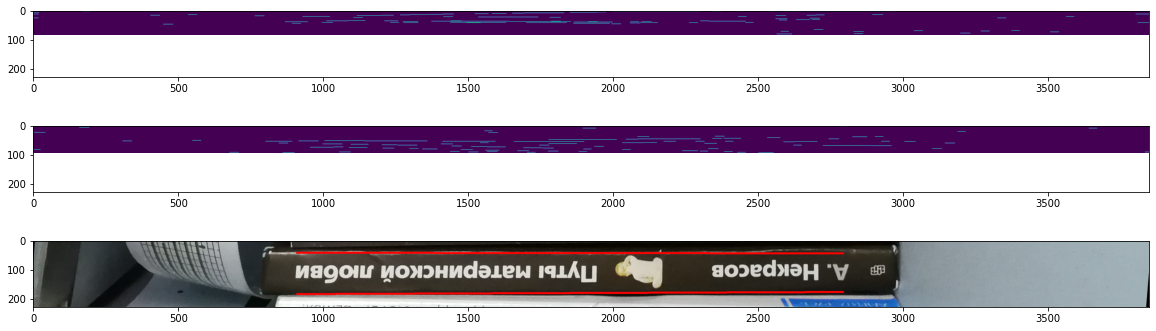

In [30]:
from cv2 import ximgproc as ximg


# Distance between 2 points
def d(A, B):
    return np.sqrt(np.sum((A-B)**2))


# Calculate angle of the line
def line_angle(A, B, full=False, shift=False):
    if not shift:
        side = A - B
        if side[0] == 0:
            if side[1] > 0:
                angle = np.pi / 2
            else:
                angle = -np.pi / 2

        else:
            angle = np.arctan(side[1] / side[0])

        if full:
            if side[0] < 0:
                if angle <= 0:
                    angle += np.pi
                elif angle > 0:
                    angle -= np.pi
    else:
        side = B - A
        angle = np.arctan2(side[0], side[1])

    return angle

# Calculate length and angle for a box
def box_angle(b, longside = True):
    # Incline of longer side
    if longside and np.sum((b[1]-b[0])**2) < np.sum((b[2]-b[1])**2):
        b = np.roll(b, 1, axis=0)

    #length = max(np.sqrt(np.sum((b[1]-b[0])**2)), np.sqrt(np.sum((b[2]-b[1])**2)))
    angle = line_angle(b[0], b[1])

    if not longside:
        if angle > np.pi/4:
            angle -= np.pi/2
        elif angle < -np.pi/4:
            angle += np.pi/2

    return angle

def rotate_rect(img, contour, trace=False):
    theta = box_angle(np.reshape(contour, (4,2)))

    # rotate img
    if theta > np.pi * 0.5:
        theta = theta - np.pi

    x, y, w, h = cv2.boundingRect(contour)

    maxY, maxX = img.shape[:2]
    marginX, marginY = 0, 0 #np.int0(0.1 * w), np.int0(0.1 * h)

    w, h = w + 2 * marginX, h + 2 * marginY
    x, y = x - marginX, y - marginY

    if x < 0:
        w, x = w - x, 0

    if y < 0:
        h, y = h - y, 0

    if x + w >= maxX:
        w = maxX - x - 1

    if y + h >= maxY:
        h = maxY - y - 1

    rx = w // 2
    ry = h // 2

    # crop source
    d1 = np.array([x, y])
    img_crop = img[y:y + h, x:x + w]
    contour[:, :, 0] = contour[:, :, 0] - x
    contour[:, :, 1] = contour[:, :, 1] - y

    if trace:
        print('Image before rotation: ', img_crop.shape)
        #plot_img(img_crop, show=True)
        print('Contour before rotation: ', contour)
        print('Bounding rectangle: ', x, y, w, h)
        print('Rotation centre: ', rx, ry)

    # grab the rotation matrix
    M = cv2.getRotationMatrix2D((rx, ry), theta / np.pi * 180, 1)

    # grab the sine and cosine (i.e., the rotation components of the matrix)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - rx
    M[1, 2] += (nH / 2) - ry

    # rotate contour
    contour_rot = np.int0(cv2.transform(contour, M))[0]

    # Rotate image
    img_rot = cv2.warpAffine(img_crop, M, (nW, nH))

    if trace:
        print('Image after rotation: ', img_rot.shape)
        #plot_img(img_rot, show=True)

    # mask = np.zeros(img_rot.shape[0:2])
    # cv2.drawContours(mask, np.array([contour_rot]), -1, 255, -1)
    # img_masked = np.zeros_like(img_rot)
    # img_masked[mask == 255] = img_rot[mask == 255]

    # crop
    x, y, w, h = cv2.boundingRect(contour_rot)

    maxY, maxX = img_rot.shape[:2]
    marginX, marginY = 0, 0 #np.int0(0.2 * w), np.int0(0.05 * h)
    w, h = w + 2 * marginX, h + 2 * marginY
    x, y = x - marginX, y - marginY

    if x < 0:
        w, x = w - x, 0

    if y < 0:
        h, y = h - y, 0

    if x + w >= maxX:
        w = maxX - x - 1

    if y + h >= maxY:
        h = maxY - y - 1

    d2 = np.array([x, y])

    # img_crop = img_masked[y:y + h, x:x + w]
    img_crop = img_rot[y:y + h, x:x + w]
    if trace:
        print('Image cropped:', img_crop.shape)
        #plot_img(img_crop, show=True)

    return img_crop, M, d1, d2

# Rotate contours back to original image coordinates
def restore(contour, M, d1, d2):
    iM = cv2.invertAffineTransform(M)
    contour += d2
    contour = np.int0(cv2.transform(contour, iM))
    contour += d1
    return contour

# Rotate contours back to original image coordinates
def transform(contour, M, d1, d2):
    contour -= d1
    contour = np.int0(cv2.transform(contour, M))
    contour -= d2
    return contour


# Rotate points around the center
def rotate_only(points, theta, trace=False):
    rx, ry = 0, 0

    if trace:
        print('Contour before rotation: ', points)

    # grab the rotation matrix
    M = cv2.getRotationMatrix2D((0, 0), theta / np.pi * 180, 1)

    # grab the sine and cosine (i.e., the rotation components of the matrix)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    #nW = int((h * sin) + (w * cos))
    #nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    #M[0, 2] += (nW / 2) - rx
    #M[1, 2] += (nH / 2) - ry

    # rotate contour
    contour_rot = np.int0(cv2.transform(points, M))

    if trace:
        print('Contour after rotation: ', contour_rot)

    return contour_rot

def spine_rectangle(contour):
    rect = cv2.minAreaRect(contour)
    return np.int0(cv2.boxPoints(rect))

def is_between(a, b, c):
    return (a[0] <= c[0] <= b[0] or b[0] <= c[0] <= a[0]) and (a[1] <= c[1] <= b[1] or b[1] <= c[1] <= a[1])


def extend_line(line, W):
    (x1, y1), (x2, y2) = line
    y_start = np.int0(y1 - x1 * (y2 - y1) / (x2 - x1))
    y_end = np.int0(y1 + (W - x1) * (y2 - y1) / (x2 - x1))
    return np.array([[0, y_start], [W, y_end]])


# Segment vertical lines                
def horisontal_lines(image):
    canny = cv2.Canny(image, 30, 150)
    lines = cv2.HoughLinesP(canny, 1, 0.2 * np.pi/180, threshold = 100, minLineLength = 500, maxLineGap = 50)
    mask = canny
    
    if lines is None:
        #print('Canny failed')
        kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.int8)

        horizontal = cv2.filter2D(image, cv2.CV_32F, kernel)
        horizontal = np.abs(horizontal)
        horizontal[horizontal>255] = 255
        horizontal = np.uint8(horizontal)

        _, threshold = cv2.threshold(horizontal, 0, 255 ,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        #closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations = 3)

        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        #opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations = 3)

        thinned = cv2.ximgproc.thinning(threshold, thinningType = cv2.ximgproc.THINNING_ZHANGSUEN) #THINNING_GUOHALL

        mask = thinned
        
        #lines= cv2.HoughLines(thinned, 1, np.pi/180.0, 165, srn=0, stn=0, min_theta=0.97*np.pi/2, max_theta=1.03*np.pi/2)
        lines = cv2.HoughLinesP(thinned, 1, 0.2 * np.pi/180, threshold = 100, minLineLength = 500, maxLineGap = 100)
    
        if lines is None:
            lines = cv2.HoughLinesP(thinned, 1, np.pi/180, threshold = 50, minLineLength = 250, maxLineGap = 100)

    #if lines is not None:
    #    for line in lines:
    #        #print(type(line), line.shape)
    #        cv2.line(mask, (line[0][0], line[0][1]), (line[0][2], line[0][3]), 255, 2)


    # Group close lines together
    # Join lines which overlap or almost connected, with identical angle and little gap
    
    line_norm = []
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                l = np.array([[x1,y1], [x2, y2]])
                #print(l)
                # First point always left
                if l[0,0] >= l[1,0]:
                    print('Rotation', l)
                    l = np.roll(l, 1, axis=0)
                    print(l)
                line_norm.append(l)
            
    (H, W) = image.shape[:2]
    result_lines = []
    weights = []
    for l in line_norm:
        angle = line_angle(l[0], l[1], shift=True)
        weight = d(l[0], l[1])
        #print('Line angle:', angle * 180 / np.pi)
        if angle < 0:
            print(l)
        # Skip lines not aligned to the book spine
        if angle < 0.95 * np.pi / 2 or angle > 1.05 * np.pi / 2:
            continue
        c = (l[0] + l[1]) // 2
        merged = False
        for n, j_l in enumerate(result_lines):
            j_c = (j_l[0] + j_l[1]) // 2
            # Vertical gap (<3), horizontal overlap (<5)
            if abs((c-j_c)[1]) < 7 and abs((c-j_c)[0]) < (abs(l[1,0]-l[0,0]) + abs(j_l[1,0] - j_l[0,0])) // 2 + 5:
                j_angle = line_angle(j_l[0], j_l[1], shift=True)
                #print('Result angle:', j_angle * 180 / np.pi)
                # Angle difference (< 3 degree)
                if abs(angle - j_angle) < 3 * np.pi / 180:
                    #print('Lengthes:', weight, weights[n])
                    r_angle = (angle * weight + j_angle * weights[n]) / (weight + weights[n])
                    #print('Average angle:', r_angle * 180 / np.pi)
                    r_center = (c * weight + j_c * weights[n]) // (weight + weights[n])
                    #print('Center:', r_center)
                    x_start = min((l[0, 0], j_l[0,0], l[1, 0], j_l[1,0]))
                    x_end = max((l[0, 0], j_l[0,0], l[1, 0], j_l[1,0])) 
                    #print('X start/end:', x_start, x_end)
                    r_l = np.array([[x_start, r_center[1]], [x_end, r_center[1]]])
                    r_center = (r_l[0] + r_l[1]) / 2
                    r_l = np.int0(rotate_only(np.expand_dims(r_l-r_center, axis=0), r_angle - np.pi/2)[0] + r_center) # TODO: Validate direction
                    result_lines[n] = r_l
                    weights[n] += weight
                    merged = True
                    #print('Line merged:', l, r_l)
        if not merged:
            #print('Line NOT merged:', l)
            result_lines.append(l)
            weights.append(weight)
                
        
    if result_lines is not None:
        for line in result_lines:
            #print(type(line), line.shape)
            cv2.line(mask, (line[0][0], line[0][1]), (line[1][0], line[1][1]), 255, 2)
    
    #print('LINES:', lines)
    
    result_lines.sort(key=lambda line:line[0][1])
    
    return result_lines, mask #canny #thinned #opened #threshold #horizontal #thinned


# Segment vertical lines                
def vertical_lines(image):
    canny = cv2.Canny(image, 30, 150)
    lines = cv2.HoughLinesP(canny, 1, 0.2 * np.pi/180, threshold = 30, minLineLength = 50, maxLineGap = 10)
    mask = canny
    
    if False: #lines is None:
        print('Canny failed')
        kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.int8)

        horizontal = cv2.filter2D(image, cv2.CV_32F, kernel)
        horizontal = np.abs(horizontal)
        horizontal[horizontal>255] = 255
        horizontal = np.uint8(horizontal)

        _, threshold = cv2.threshold(horizontal, 0, 255 ,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        #closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations = 3)

        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        #opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations = 3)

        thinned = ximg.thinning(threshold, thinningType = ximg.THINNING_ZHANGSUEN) #THINNING_GUOHALL

        mask = thinned
        
        #lines= cv2.HoughLines(thinned, 1, np.pi/180.0, 165, srn=0, stn=0, min_theta=0.97*np.pi/2, max_theta=1.03*np.pi/2)
        lines = cv2.HoughLinesP(thinned, 1, 0.2 * np.pi/180, threshold = 100, minLineLength = 500, maxLineGap = 100)
    
        if lines is None:
            lines = cv2.HoughLinesP(thinned, 1, np.pi/180, threshold = 50, minLineLength = 250, maxLineGap = 100)

    if lines is not None:
        for line in lines:
            print(type(line), line.shape)
            cv2.line(mask, (line[0][0], line[0][1]), (line[0][2], line[0][3]), 255, 2)


    # Group close lines together
    # TODO: Take average instead of skip
    
    (H, W) = image.shape[:2]
    ext_lines = []
    if lines is not None:
        for line in lines:
            #print(type(line), line.shape)
            for x1,y1,x2,y2 in line:
                if x2 != x1:
                    ext_lines.append(extend_line(np.array([[x1,y1], [x2,y2]]), W-1))
                
    result_lines = []
    eps = 5 # Play with the value
    for l in ext_lines:
        to_be_added = True
        for r in result_lines:
            if abs(l[0][1] - r[0][1]) <= eps and abs(l[1][1] - r[1][1]) <= eps:
                to_be_added = False
                break
        if to_be_added:
            result_lines.append(l)
        
    #if result_lines is not None:
    #    for line in result_lines:
    #        #print(type(line), line.shape)
    #        cv2.line(mask, (line[0][0], line[0][1]), (line[1][0], line[1][1]), 255, 2)
    
    #print('LINES:', lines)
    
    result_lines.sort(key=lambda line:line[0][1])
    
    return result_lines, mask #canny #thinned #opened #threshold #horizontal #thinned


# Segment vertical lines                
def verify_line(line, text, image, trace = False):
    (H, W) = image.shape[:2]

    kernel = np.array([[1],
                       [-1]], dtype=np.int8)

    horizontal = cv2.filter2D(image, cv2.CV_32F, kernel)
    horizontal = np.abs(horizontal)
    #horizontal = horizontal * 255 / np.amax(horizontal, axis=0) # Divide by maximum in each column
    horizontal = horizontal * 255 / np.amax(horizontal) # Divide by global maximum
    #horizontal = np.uint8(horizontal)

    kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=np.int8)
    horizontal = cv2.filter2D(horizontal, cv2.CV_32F, kernel)
    #horizontal = np.uint8(horizontal / 16)

    #kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #                   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #                   [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    #                   [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.int8)

    line_mask = np.zeros_like(image)
    cv2.line(line_mask, (line[0, 0]-2, line[0, 1]), (line[1, 0]+2, line[1, 1]), 1, thickness=1)
    line_y, _ = np.nonzero(line_mask)

    # TODO: Make it parameter
    gradient_threshold = 4

    edge = np.copy(line_y)
    extrema_y, extrema_x = argrelextrema(horizontal, np.greater, order=3, axis=0)

    horizontal = np.zeros_like(horizontal, dtype=np.uint8)
    horizontal[extrema_y, extrema_x] = 255
    #kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=np.int8)
    #horizontal = cv2.filter2D(horizontal, cv2.CV_32F, kernel)
    #horizontal = np.uint8(horizontal / 16)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(10, 1))
    horizontal = cv2.morphologyEx(horizontal, cv2.MORPH_OPEN, kernel, iterations = 3)    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(20, 1))
    horizontal = cv2.morphologyEx(horizontal, cv2.MORPH_CLOSE, kernel, iterations = 3)
    
    output_mask = horizontal
    
    if trace:
        print('mask shape/dtype:', line_mask.shape, line_mask.dtype)
    
    # Filter all extremas to have only these which
    #  - are within 30 pixels distance from expected line
    #  - in top three gradient among extremas on the same x-coordinate
    
    # Go along the line and find closest extrema to the expected edge
    # Choose the extremas which are forming longer line
    for i in []: #range(1, W-1):
        # Filter out extremas with very flat curve
        extremas = extrema_y[extrema_x == i]
        idx = []
        gradient = []
        for j in extremas:
            avg_t = np.sum(horizontal[j-4:j-1, i])//3
            avg = np.sum(horizontal[j-1:j+2, i])//3
            avg_b = np.sum(horizontal[j+2:j+5, i])//3
            gradient.append((avg - avg_t + avg - avg_b) / 2)
            idx.append(j)
               
        gradient = np.array(gradient)
        extremas = np.array(idx)[np.argsort(-gradient)[:3]]

        if len(extremas) > 0:
            closest_extrema = np.argmin(abs(extremas - edge[i-1]))
            # If jump on the current line or line diverse more than 30 pixels from expected
            # TODO: Scale parameters
            if abs(extremas[closest_extrema] - edge[i-1]) > 3 or abs(extremas[closest_extrema] - line_y[i]) > 30 : 
                closest_extrema = np.argmin(abs(extremas - line_y[i]))
            # TODO: Scale parameters
            if abs(extremas[closest_extrema] - line_y[i]) <= 30:
                edge[i] = extremas[closest_extrema]


    horizontal = np.uint8(horizontal)
    if trace:
        #print('40:80', horizontal[40:80, 600:610])
        #print('line:', line_max[600:610])
        #print('------------------------------')
        print('00:15', horizontal[0:15, 2880:2900])
        print('27:45', horizontal[27:45, 2880:2900])
        print('line:', line_y[2880:2900])
        print('edge:', edge[2880:2900])

    # Was trying to adjust center of line based on the gradient maximum
    #line_max = np.argmax(horizontal, axis=0)

    mesh = np.mgrid[0:H,0:W][0]
    top_mask = np.logical_and(mesh >= edge - 4, mesh < edge - 1)
    line_mask = np.logical_and(mesh >= edge - 1, mesh <= edge + 1)
    bottom_mask = np.logical_and(mesh > edge + 1, mesh <= edge + 4)
    
    #print(top_mask[:, 2100:2120])
    
    top_avg = np.uint8(np.sum(top_mask * horizontal, axis=0) / np.count_nonzero(top_mask, axis=0))
    line_avg = np.uint8(np.sum(line_mask * horizontal, axis=0) / np.count_nonzero(line_mask, axis=0))
    bottom_avg = np.uint8(np.sum(bottom_mask * horizontal, axis=0) / np.count_nonzero(bottom_mask, axis=0))

    recognized = np.logical_and(line_avg > top_avg + gradient_threshold, line_avg > bottom_avg + gradient_threshold) 
    recognized = np.uint8(recognized)

    #line_mask = np.zeros_like(image)
    #line_mask = cv2.line(line_mask, (line[0, 0]-1, line[0, 1]), (line[1, 0]+1, line[1, 1]), 255, thickness=5)
    #line_mask = np.uint8(recognized * line_mask)
    

    # X coordinates of text on the bookspine
    text_start = min(text[0, :, 0])
    text_end = max(text[0, :, 0])
    
    # Identify if line jump and make a break there
    for i in range(text_start, 4, -1):
        # TODO: Scale this threshold
        if abs(edge[i] - np.average(edge[i:i+11])) > 3:
            recognized[i] = 0
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(10, 1))
    recognized = recognized.reshape(1, -1)
    recognized = cv2.morphologyEx(recognized, cv2.MORPH_OPEN, kernel, iterations = 3)    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(20, 1))
    recognized = cv2.morphologyEx(recognized, cv2.MORPH_CLOSE, kernel, iterations = 3)
    recognized = recognized.reshape(-1)
    
    gaps = np.argwhere(recognized == 0)
    line_start = np.max(gaps[gaps < text_start], initial=0)
    line_end = np.min(gaps[gaps > text_end], initial=W-1)
    
    # Fill gaps inside line if any remove lines outside a bookspine
    recognized[0:line_start] = 0
    recognized[line_end:] = 0
    recognized[line_start:line_end+1] = 1
    
    #line_mask = np.zeros_like(image)
    #line_mask = cv2.line(line_mask, (line[0, 0]-1, line[0, 1]), (line[1, 0]+1, line[1, 1]), 255, thickness=5)
    #line_mask = np.uint8(recognized * line_mask)
    
    # TODO: Adjust line with linregress function

    (x1, y1), (x2, y2) = line
    
    y_start = np.int0(y2 - (x2 - line_start) * (y2 - y1) / (x2 - x1))
    y_end = np.int0(y1 + (line_end - x1) * (y2 - y1) / (x2 - x1))

    return np.array([[line_start, y_start], [line_end, y_end]]), output_mask

(H, W) = img.shape[:2]
results = json.loads(result_blob.download_as_string())
rects = np.array([spine_rectangle(np.array(b['outline'])) for b in results['recognized'] + results['unrecognized']])

rects = np.append(rects, [[[0, 0], [0, H], [W, H], [W, 0]]], axis = 0)
#print(rects.shape)

results = np.empty((0,4,2), dtype=np.int16)

for i in [5]: #range(rects.shape[0] - 1): 
    # 3 - text outside the text area
    # 3, 11 - inclined
    # 11 (bottom) - sharp only canny, not filter2D
    # 6 (bottom) - not a straight line
    # 6 (top) - "invisible" border
    # 6 (short sides) - failed (take a next book)
    # 7 (top) - difficult
    # 15 (top) - part of the spine missing !!!WRONG TEXT BLOCK!!!
    # 15 (shorts) - adjust sides after shorts
    # 11 (shorts) - short side cuted
    # 7 (shorts) - extend too far because of noise
    center = (rects[i,0] + rects[i,2]) // 2
    shifted = rects - center
    theta = box_angle(rects[i, :, :])
    rotated = rotate_only(shifted, theta)
    
    #print(rotated[i, :, :])
    #print(np.min(rotated[i, :, :], axis=0))
    #print(np.max(rotated[i, :, :], axis=0))
    
    l_min, h_min = np.min(rotated[i, :, :], axis=0)
    l_max, h_max = np.max(rotated[i, :, :], axis=0)
    
    # List of indexes to process
    indexes = np.ones((rects.shape[0],), dtype=int)
    indexes[i] = 0
    
    all_limits = np.empty((0,2), dtype=np.int16)
    #print('All limits:', all_limits.shape)
    
    # Loop through all sides and find the one which are limiting given box
    for j in range(rotated.shape[0]):
        # Skip the box itself
        if j == i:
            continue
            
        # Check if points are in the projection of the original box
        points = np.reshape(rotated[j, :, :], (-1, 2))
        #print(points.shape)

        # Check if each side is intersect with the projection of the box
        for k in range(4):
            # Find intersection of section to box projection
            a, b = points[k, :], points[(k+1) % 4, :]
            #print('Points: ', a, b)
            
            if b[0] == a[0]:
                candidates = [[a[0], h_min], [a[0], h_max]]
            elif b[1] == a[1]:
                candidates = [[l_min, a[1]], [l_max, a[1]]]
            else:
                candidates = [[l_min, a[1] + (l_min - a[0]) * (b[1] - a[1]) / (b[0] - a[0])],
                              [l_max, a[1] + (l_max - a[0]) * (b[1] - a[1]) / (b[0] - a[0])],
                              [a[0] + (h_min - a[1]) * (b[0] - a[0]) / (b[1] - a[1]), h_min],
                              [a[0] + (h_max - a[1]) * (b[0] - a[0]) / (b[1] - a[1]), h_max]]
            
            limits = [np.int0(p) for p in candidates if is_between(a,b,p)]
                  
            if len(limits) > 0:
                #print('Limits:', limits)
                #print('Limits shape:', np.array(limits).shape)
                all_limits = np.append(all_limits, np.array(limits), axis=0)
                #print('All limits:', all_limits.shape)
        
    #print('All limits:', all_limits)
    #print(indexes)
    #print(rotated.shape)
    #print(rotated[indexes==1, :, :].shape)

    #print(rotated[indexes==1, :, :])
    
    points = np.reshape(rotated[indexes==1, :, :], (-1, 2))
    #print(points.shape)
    
    left = np.all([points[:,0] < l_min, points[:,1] >= h_min, points[:,1] <= h_max], axis=0)
    right = np.all([points[:,0] > l_max, points[:,1] >= h_min, points[:,1] <= h_max], axis=0)
    top = np.all([points[:,1] < h_min, points[:,0] >= l_min, points[:,0] <= l_max], axis=0)
    bottom = np.all([points[:,1] > h_max, points[:,0] >= l_min, points[:,0] <= l_max], axis=0)
    
    if np.sum(left) > 0:
        all_limits = np.append(all_limits, points[left], axis=0)
        #print('All limits (add from left):', all_limits.shape)

    if np.sum(right) > 0:
        all_limits = np.append(all_limits, points[right], axis=0)
        #print('All limits (add from right):', all_limits.shape)

    if np.sum(top) > 0:
        all_limits = np.append(all_limits, points[top], axis=0)
        #print('All limits (add from top):', all_limits.shape)
                              
    if np.sum(bottom) > 0:
        all_limits = np.append(all_limits, points[bottom], axis=0)
        #print('All limits (add from bottom):', all_limits.shape)

    points = all_limits
                              
    left = np.max(points[np.all([points[:,0] <= l_min, points[:,1] >= h_min, points[:,1] <= h_max], axis=0), 0])
    right = np.min(points[np.all([points[:,0] >= l_max, points[:,1] >= h_min, points[:,1] <= h_max], axis=0), 0])
    top = np.max(points[np.all([points[:,1] <= h_min, points[:,0] >= l_min, points[:,0] <= l_max], axis=0), 1])
    bottom = np.min(points[np.all([points[:,1] >= h_max, points[:,0] >= l_min, points[:,0] <= l_max], axis=0), 1])
    
    result = np.array([[[left, top], [right, top], [right, bottom], [left, bottom]]])
    result_rotated = rotate_only(result, -theta)
    result_shifted = result_rotated + center
    #results = np.append(results, result_shifted, axis=0)

    img_crop, M, d1, d2 = rotate_rect(img, result_shifted, trace=False)

    gray = cv2.cvtColor(img_crop,cv2.COLOR_BGR2GRAY)
    blurred = cv2.bilateralFilter(gray,7,10,150)

    (H, W) = img_crop.shape[:2]
    
    top_start_idx = 0
    top_end_idx = h_min - top
    bottom_start_idx = h_max - top
    bottom_end_idx = H - 1
    
    start_idx = l_min - left
    end_idx = l_max - left
    
    # Upper part
    top_lines, mask = horisontal_lines(blurred[top_start_idx:top_end_idx, start_idx:end_idx])
    #print('Top lines:', top_lines)
    
    #plt.figure(figsize = (20,20))
    #plt.imshow(cv2.bitwise_or(gray[top_start_idx:top_end_idx, start_idx:end_idx], mask))
    #plt.imshow(mask)
    #break
    
    # Lower part
    bottom_lines, mask = horisontal_lines(blurred[bottom_start_idx:bottom_end_idx, start_idx:end_idx])

    #plt.figure(figsize = (20,20))
    #plt.imshow(cv2.bitwise_or(gray[bottom_start_idx:bottom_end_idx, start_idx:end_idx], mask))
    #plt.imshow(mask)
    #break

    # Add shift for the cutting
    bottom_lines = bottom_lines + np.array([0, bottom_start_idx])
    #print('Bottom lines:', bottom_lines)

    # Add shift for the cutting
    top_edge = top_lines[-1] + [start_idx, 0]
    top_edge = extend_line(top_edge, W)
    
    bottom_edge = bottom_lines[0] + [start_idx, 0]
    bottom_edge = extend_line(bottom_edge, W)
    
    #cv2.line(img_crop, tuple(top_edge[0]),tuple(top_edge[1]),(0,255,0),2)
    #cv2.line(img_crop, tuple(bottom_edge[0]), tuple(bottom_edge[1]),(0,255,0),2)
    #plt.figure(figsize = (20,20))
    #plt.imshow(img_crop)
    #break
    
    # Adjust rotation based on spine sides
    result = np.array([[top_edge[0], top_edge[1], bottom_edge[1], bottom_edge[0]]])
    borders_restored = restore(result, M, d1, d2)
    results = np.append(results, borders_restored, axis=0)

    # Take some margins to analyse superpixels behind edge
    margin = 40 # TODO: Make it size dependant
    result = np.array([[top_edge[0] - [0, margin], top_edge[1] - [0, margin], bottom_edge[1] + [0, margin], bottom_edge[0]  + [0, margin]]])
    box_restored = restore(result, M, d1, d2)
    
    rect = np.expand_dims(spine_rectangle(box_restored), axis=0)

    #r_img = np.copy(img)
    #print(result_transformed.shape)
    #print(rect.shape)
    #cv2.drawContours(r_img, rect, -1, (0,255,0), 10)
    #plt.figure(figsize = (20,20))
    #plt.imshow(r_img)
    #break
    
    img_crop, M, d1, d2 = rotate_rect(img, rect, trace=False)
    sides = transform(borders_restored, M, d1, d2)
    text = transform(rects[i:i+1, :, :], M, d1, d2)
    x, y, w, h = cv2.boundingRect(text.reshape((-1,2)))
    text = np.array([[[x,y], [x+w, y], [x+w, y+h], [x, y+h]]])
    
    gray = cv2.cvtColor(img_crop,cv2.COLOR_BGR2GRAY)
    blurred = cv2.bilateralFilter(gray,7,10,150)
    (H, W) = img_crop.shape[:2]

    up = abs(y - np.average(sides[0, :2,1]))
    lo = abs(y + h - np.average(sides[0, 2:,1]))

    #print(sides)
    #print(x, y, w, h)
    #print('Upper:', up)
    #print('Lower:', lo)
    
    # Doublecheck upper edge
    if up > 2 * lo:
        a, b = sides[0, 0], sides [0, 1]
        top_start_idx = np.int0(max((a + x*(b-a)/W)[1], (a + (x+w)*(b-a)/W)[1]))
        top_end_idx = y
        start_idx = x
        end_idx = x + w
        #print(a, b)
        #print((a + x*(b-a)/W)[1], (a + (x+w)*(b-a)/W)[1])
        #print('Top start index:', top_start_idx)


        # Upper part
        top_lines, mask = horisontal_lines(blurred[top_start_idx:top_end_idx, start_idx:end_idx])
        
        # If lines found refresh bounding
        if len(top_lines) > 0:
            top_edge = top_lines[-1] + [start_idx, top_start_idx]
            top_edge = extend_line(top_edge, W)
            sides[0, 0:2] = top_edge[0:2]
            
        #for l in top_lines:
        #    print(l)

        #plt.figure(figsize = (20,20))
        #plt.imshow(cv2.bitwise_or(gray[top_start_idx:top_end_idx, start_idx:end_idx], mask))
        #plt.imshow(mask)
        #break        
        
    # Doublecheck lower edge
    elif lo > 2 * up:
        a, b = sides[0, 3], sides [0, 2]
        bottom_start_idx = y + h
        bottom_end_idx = np.int0(min((a + x*(b-a)/W)[1], (a + (x+w)*(b-a)/W)[1]))
        start_idx = x
        end_idx = x + w

        # Bottom part
        bottom_lines, mask = horisontal_lines(blurred[bottom_start_idx:bottom_end_idx, start_idx:end_idx])

        if len(bottom_lines) > 0:
            bottom_edge = bottom_lines[0] + [start_idx, bottom_start_idx]
            bottom_edge = extend_line(bottom_edge, W)
            sides[0, 2], sides[0, 3] = bottom_edge[1], bottom_edge[0]
    
    # Find where top horizontal lines ends
    a, b = sides[0, 0], sides [0, 1]
    top_start_idx = max(0, min(a[1], b[1]) - 40)
    top_end_idx = max(a[1], b[1]) + 40 # min(min(text[0, :, 1]), max(a[1], b[1]) + 10)
    start_idx = 0
    end_idx = W-1

    # Upper part
    line = sides[0, 0:2, :] - np.array([0, top_start_idx])
    top_line, mask1 = verify_line(line, text - [start_idx, top_start_idx], blurred[top_start_idx:top_end_idx, start_idx:end_idx], trace = True)

    print('mask1:', mask1.shape, mask1.dtype)
    
    # Adjust coordinate with the shift
    top_line += [start_idx, top_start_idx]
    print(top_line)
    
    # Find where bottom horizontal line ends
    a, b = sides[0, 3], sides [0, 2]
    bottom_start_idx = min(a[1], b[1]) - 40 #max(max(text[0, :, 1]), min(a[1], b[1]) - 10)
    bottom_end_idx = min(H-1, max(a[1], b[1]) + 40)
    #print(bottom_start_idx, bottom_end_idx)
    start_idx = 0
    end_idx = W-1

    # Bottom part
    # Swap direction of the side
    line = np.array([sides[0, 3], sides [0, 2]]) - np.array([0, bottom_start_idx])
    bottom_line, mask2 = verify_line(line, text - [start_idx, bottom_start_idx], blurred[bottom_start_idx:bottom_end_idx, start_idx:end_idx])

    print('mask2:', mask2.shape, mask2.dtype)

    # Adjust coordinate with the shift
    bottom_line += [start_idx, bottom_start_idx]

    fig, axs = plt.subplots(3, 1, sharey=True, figsize=(20, 6))
    #axs[0].imshow(cv2.bitwise_or(gray[top_start_idx:top_end_idx, start_idx:end_idx], mask1))
    axs[0].imshow(mask1)
    #axs[1].imshow(cv2.bitwise_or(gray[bottom_start_idx:bottom_end_idx, start_idx:end_idx], mask2))
    axs[1].imshow(mask2)
    cv2.line(img_crop, (top_line[0,0], top_line[0,1]), (top_line[1,0], top_line[1,1]), (255, 0, 0), 5)
    cv2.line(img_crop, (bottom_line[0,0], bottom_line[0,1]), (bottom_line[1,0], bottom_line[1,1]), (255, 0, 0), 5)
    axs[2].imshow(img_crop) 
    plt.show()
    
    break
 
    # TODO: Recalculate sides more accurately
    # TODO: Calculate confidence
    if t_start_line is not None and b_start_line is not None:
        sides[0, 0, 0] = min(b_start_line, t_start_line)
        sides[0, 3, 0] = min(b_start_line, t_start_line)
        sides[0, 1, 0] = max(b_end_line, t_end_line)
        sides[0, 2, 0] = max(b_end_line, t_end_line)
    elif t_start_line is not None:
        sides[0, 0, 0] = t_start_line
        sides[0, 3, 0] = t_start_line
        sides[0, 1, 0] = t_end_line
        sides[0, 2, 0] = t_end_line
    elif b_start_line is not None:
        sides[0, 0, 0] = b_start_line
        sides[0, 3, 0] = b_start_line
        sides[0, 1, 0] = b_end_line
        sides[0, 2, 0] = b_end_line
    
    r_img = np.copy(img_crop)
    cv2.drawContours(r_img, sides, -1, (0,255,0), 10)
    plt.figure(figsize = (20,20))
    plt.imshow(r_img)
    break

    # Doublecheck horizontal lines on adjusted image (to find missing line)
    # Only check if sides are asymetric
    
    # Convert to LAB
    #blurred = cv2.bilateralFilter(img_crop,7,150,150)
    blurred = cv2.GaussianBlur(img_crop, (7, 7), 0)
    img_lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB) # convert to LAB
    #img_lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV) # convert to LAB

    # SLIC
    cv_slic = ximg.createSuperpixelSLIC(img_lab, algorithm = ximg.SLIC, region_size = 100)
    cv_slic.iterate(50)
    mask = cv_slic.getLabelContourMask()
    
    mask_img = np.zeros_like(img_crop)
    mask_img[:,:,0] = mask * -255
    mask_img[:,:,1] = mask * 0
    mask_img[:,:,2] = mask * 0

    r_img = np.copy(img_crop)
    cv2.drawContours(r_img, sides, -1, (0,255,0), 10)
    plt.figure(figsize = (20,20))
    plt.imshow(cv2.bitwise_or(r_img, mask_img)[:, 1100:3200, :])
    #plt.imshow(mask)
    break

    gray = cv2.cvtColor(img_crop,cv2.COLOR_BGR2GRAY)
    blurred = cv2.bilateralFilter(gray,11,150,150)

    (H, W) = img_crop.shape[:2]
    print('SIZE:', H, W)
    print('INPUT:', l_min, l_max, h_min, h_max)                              
    print('RESULT:', left, right, top, bottom)
    
    left_start_idx = 0
    left_end_idx = x
    right_start_idx = x + w
    right_end_idx = W - 1
    
    start_idx = 0
    end_idx = H-1
        
    # Upper part
    left_lines, mask = vertical_lines(blurred[start_idx:end_idx, left_start_idx:left_end_idx])
    #print('Top lines:', top_lines)
    
    plt.figure(figsize = (20,20))
    plt.imshow(cv2.bitwise_or(gray[start_idx:end_idx, left_start_idx:left_end_idx], mask))
    #plt.imshow(mask)
    break

    fig, axs = plt.subplots(2, 1, figsize=(20, 2))
    axs[0].imshow(horizontal)
    #axs[1].imshow(img_crop[top_start_idx:top_end_idx, start_idx:end_idx]) 
    axs[1].imshow(img_crop[:, start_idx:end_idx]) 
    
    
    plt.show()
    
    
    # Check the maximum of edge in [bottom : h_min] and [h_max : top]
    
    
    
    # HED - edge detection
    #(H, W) = img_crop.shape[:2]
    #blob = cv2.dnn.blobFromImage(img_crop, scalefactor=1.0, size=(W, H),
                             # mean=(110,95,95),
                             # mean=(104.00698793, 116.66876762, 122.67891434),
                            # mean=(104, 116, 122),
    #                          mean=(130, 120, 75),
                            #  mean=(145, 147, 180),
    #                          swapRB= False, crop=False)
    #net.setInput(blob)
    #hed = net.forward()
    #hed = cv2.resize(hed[0, 0], (W, H))
    #hed = (255 * hed).astype("uint8")
    
    #cv2.imwrite('Mask_RCNN/samples/sample2.jpg', img_crop)
    #plt.figure(figsize = (20,20))
    #plt.imshow(canny)
    #plt.imshow(r_img)
    #plt.imshow(hed)


    #thresh = cv2.dilate(thresh, horizontal_kernel)
    #thresh = cv2.erode(thresh, horizontal_kernel)
    
    # Detect horizontal lines
    #horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))

    #detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    #cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    #for c in cnts:
    #    cv2.drawContours(r_img, [c], -1, (36,255,12), 2)

    # Detect vertical lines
    #vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
    #detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    #cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    #for c in cnts:
    #    cv2.drawContours(r_img, [c], -1, (36,255,12), 2)
    
    #plt.figure(figsize = (20,20))
    #plt.imshow(r_img)
    
#cv2.drawContours(img, results, -1, (0, 255, 0), 20)



#for b in results['unrecognized']:
#    rect = spine_rectangle(np.array(b['outline']))
#    cv2.drawContours(img, [rect], 0, (0, 255, 0), 20)

#plt.figure(figsize = (20,20))
#plt.imshow(img)
#print(results)

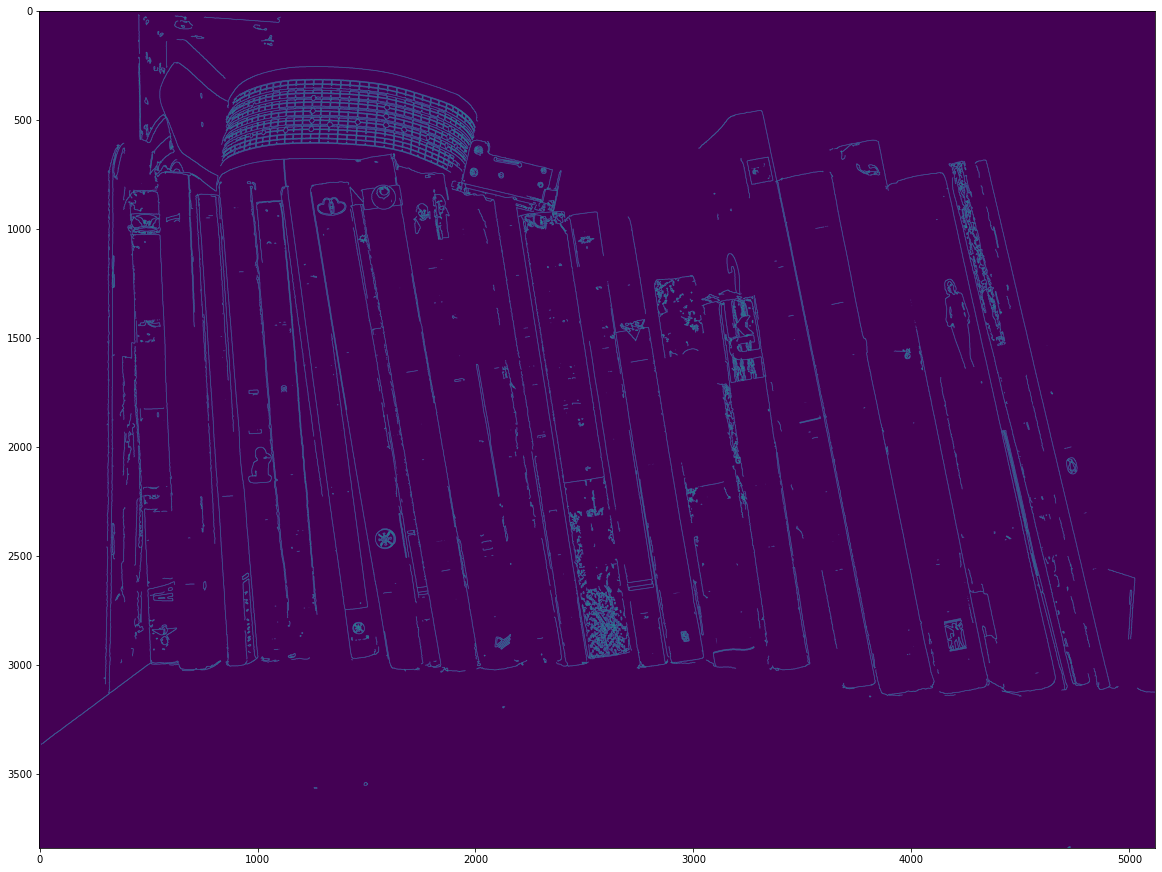

In [22]:
from google.cloud import vision

vision_client = vision.ImageAnnotatorClient()

def ocr_url(url):
    image = vision.Image()
    image.source.image_uri = url

    return vision_client.document_text_detection(image=image)

user = '0000000000000000000000000000'
shelf = '0000000000033'

image_blob = bucket.blob('images/%s/%s.jpg' % (user, shelf))

response = ocr_url('gs://biblosphere-210106.appspot.com/' + image_blob.name)


for p in response.full_text_annotation.pages:
    for b in p.blocks:
        words = set()
        for par in b.paragraphs:
            for w in par.words:
                #for s in w.symbols:
                #    v = s.bounding_box.vertices
                v = w.bounding_box.vertices
                box = np.array([[[v[0].x, v[0].y], [v[1].x, v[1].y], [v[2].x, v[2].y], [v[3].x, v[3].y]]])
                #center = (box[0,0] + box[0,2]) // 2
                #box = np.int0(0.95 * (box - center) + center) 
                cv2.drawContours(canny, box, -1, 0, -1)

plt.figure(figsize = (20,20))
plt.imshow(canny)   

In [9]:
kernel = np.array([[-1],[1]], dtype=np.int8)
i1 = np.array([[1, 1 , 1], [0, 0 , 0], [1, 1 , 1]], dtype=np.uint8)

i1 = cv2.filter2D(i1, cv2.CV_32F, kernel)

print(i1)


[[ 1.  1.  1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]]


In [21]:
i1 = np.array([[1, 1 , 1], [2, 5 , 0], [1, 1 , 1]], dtype=np.uint8)

i2 = i1 * 128.0

print(i2)

i2[i2>255] = 255

print(i2)

[[128. 128. 128.]
 [256. 640.   0.]
 [128. 128. 128.]]
[[128. 128. 128.]
 [255. 255.   0.]
 [128. 128. 128.]]


In [37]:
p = np.array([[1, 2],[3, 4]])
r = np.roll(p, 1, axis=0)
print(r)

[[3 4]
 [1 2]]


Labels number: 1927
0


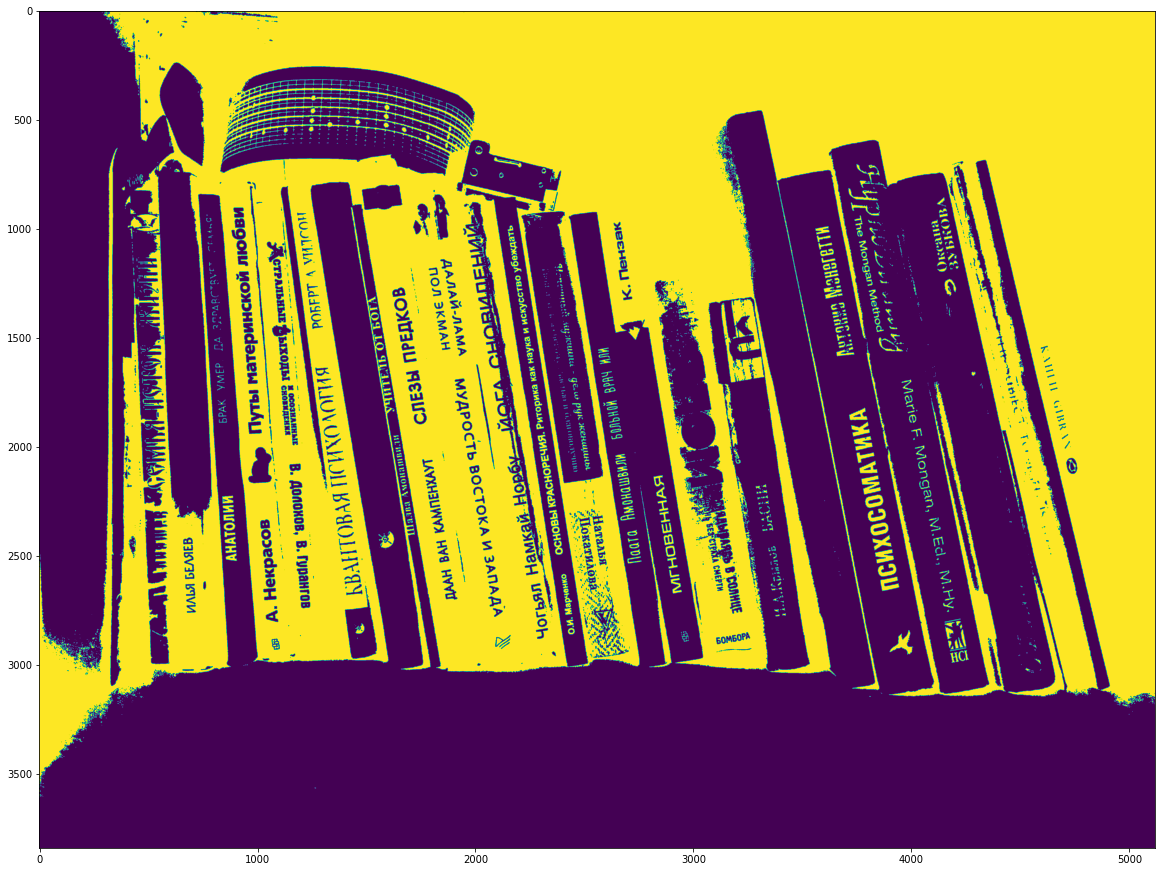

In [37]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = hsv[:,:,2:3]

#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blurred = cv2.bilateralFilter(gray,7,10,150)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
connectivity = 8  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)
print('Labels number:', num_labels)
zones = stats[stats[:,4].argsort()[::-1]][1:4, 0:4]

spine = stats[:,4].argsort()[::-1][0]
print(spine)

spine_mask = (labels == spine) * 255

plt.figure(figsize = (20,20))
plt.imshow(spine_mask)

In [29]:
m = [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
image = np.ones((5, 10)) * 25

mask = np.zeros((5, 10))
a = np.mgrid[0:5,0:10][0]
l = [2, 2, 2, 2, 2, 3, 3, 3, 3, 3]

cv2.line(mask, (0, 2), (9, 3), 1, thickness=1)
line_y, _ = np.nonzero(mask)
background = np.logical_not(mask)

mesh = np.mgrid[0:5,0:10][0]
top_mask = np.logical_and(background, (mesh < line_y))
bottom_mask = np.logical_and(background, (mesh > line_y))


print(np.sum(top_mask * image, axis=0) / np.count_nonzero(top_mask * image, axis=0))

print(np.argmax(mask * m, axis=0))

[25. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
[0 0 2 2 2 3 3 3 0 0]


In [62]:
print(np.amax(np.mgrid[0:5,0:10][0], axis = 0))

[4 4 4 4 4 4 4 4 4 4]


In [6]:
print(np.expand_dims(np.array([1, 1, 1]), axis=0).reshape(-1))

[1 1 1]


In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(3, 1))
src = np.array(np.array([0, 0, 1, 0, 0, 0]).reshape(1, -1), dtype=np.uint8)
#recognized = cv2.erode(src, kernel)
recognized = cv2.dilate(src, kernel)
print(recognized)

[[0 1 1 1 0 0]]


In [25]:
import numpy as np
from scipy.signal import argrelextrema

x = np.array([[1, 1, 1],
              [3, 1, 1],
              [3, 1, 1],
              [1, 1, 1],
              [1, 1, 1]])

#print(np.amax(x))

# for local maxima
argrelextrema(x, np.greater, axis=0)

3


(array([], dtype=int64), array([], dtype=int64))

In [8]:
print(abs(np.array([1, 2, 3]) - 2))

[1 0 1]


In [25]:
x = np.array([1, 1, 2])
y = np.array([0, 1, 0])

a = np.zeros((3,3))

a[y, x] = 1

print(a)

[[0. 1. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]
